<a href="https://colab.research.google.com/github/EmirhanKisa/Machine-Learning/blob/main/Deneyimden_maa%C5%9F_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/Salary_Data.csv")

In [14]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
# scikit-learn kütüphanesinin anlayacağı şekle sokuyoruz
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# 1. Regresyon modelini oluştur
regressor = LinearRegression()

# 2. Modeli eğitim verisiyle eğit (ilişkiyi öğren)
regressor.fit(X_train, y_train)

print("\nModel başarıyla eğitildi.")


Model başarıyla eğitildi.


In [18]:
m = regressor.coef_[0]

# 'b' (Kesişim) değerini al
b = regressor.intercept_

print(f"\n--- Modelin Bulduğu Denklem ---")
print(f"Eğim (m) - (Katsayı): {m[0]:.2f}")
print(f"Y-Kesişim (b) - (Sabit): {b[0]:.2f}")
print("\nBulunan Regresyon Denklemi:")
print(f"Maaş = {m[0]:.2f} * (Deneyim Yılı) + {b[0]:.2f}")


--- Modelin Bulduğu Denklem ---
Eğim (m) - (Katsayı): 9423.82
Y-Kesişim (b) - (Sabit): 25321.58

Bulunan Regresyon Denklemi:
Maaş = 9423.82 * (Deneyim Yılı) + 25321.58


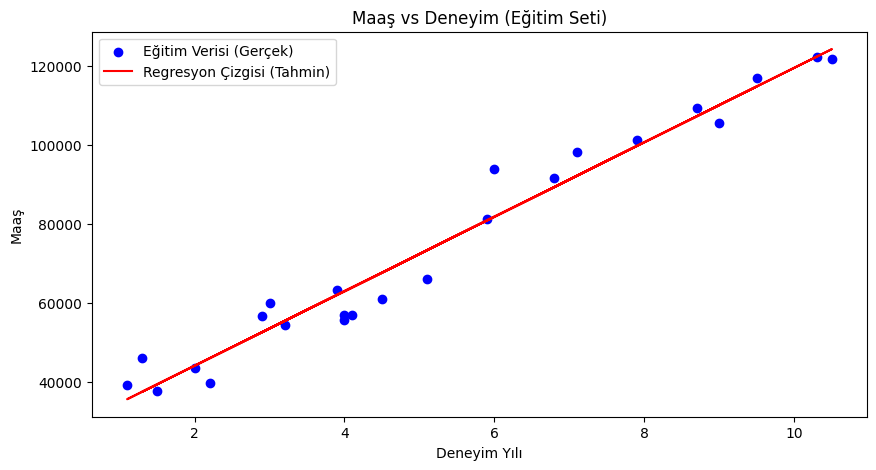

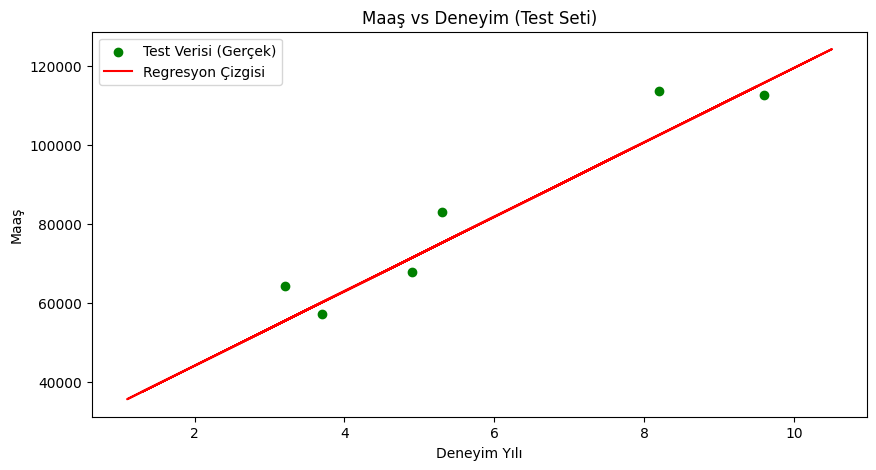

In [20]:
# 1. GRAFİK: EĞİTİM SETİ SONUÇLARI
plt.figure(figsize=(10, 5))

# Eğitim verisi noktaları (Mavi)
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verisi (Gerçek)')
# Modelin eğitim verisine göre çizdiği regresyon çizgisi (Kırmızı)
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regresyon Çizgisi (Tahmin)')

plt.title('Maaş vs Deneyim (Eğitim Seti)')
plt.xlabel('Deneyim Yılı')
plt.ylabel('Maaş')
plt.legend()
plt.show()

# 2. GRAFİK: TEST SETİ SONUÇLARI
plt.figure(figsize=(10, 5))

# Test verisi noktaları (Yeşil)
plt.scatter(X_test, y_test, color='green', label='Test Verisi (Gerçek)')
# Modelin eğitimden öğrendiği aynı çizgiyi test verisine uygulayalım (Kırmızı)
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regresyon Çizgisi')

plt.title('Maaş vs Deneyim (Test Seti)')
plt.xlabel('Deneyim Yılı')
plt.ylabel('Maaş')
plt.legend()
plt.show()

**Pozitif şeyler**

1.   Güçlü Pozitif İlişki Kırmızı çizgi net bir şekilde yukarı doğru eğimlidir Bu, beklediğimiz bir şeyi doğrular: Deneyim yılı arttıkça, maaş da artar.
2.   Overfitting Yok Eğer modeliniz eğitim setini ezberleseydi overfitting, mavi noktalara mükemmel uyar ama yeşil noktalara hiç uymazdı (noktalar çizgiden çok uzakta olurdu). Bu grafikte böyle bir durum görmüyoruz.

**Negatif şeyler**

1.   Az Test Verisi





In [21]:
# 0 yıl deneyimli birinin maaşını tahmin edelim
deneyim_yili = 0
tahmini_maas = regressor.predict([[deneyim_yili]])

print(f"\n{deneyim_yili} yıl deneyime sahip birinin tahmini maaşı: {tahmini_maas[0][0]:.2f} TL")

# 1 yıl deneyim için de deneyelim
deneyim_yili_2 = 1
tahmini_maas_2 = regressor.predict([[deneyim_yili_2]])
print(f"{deneyim_yili_2} yıl deneyime sahip birinin tahmini maaşı: {tahmini_maas_2[0][0]:.2f} TL")


0 yıl deneyime sahip birinin tahmini maaşı: 25321.58 TL
1 yıl deneyime sahip birinin tahmini maaşı: 34745.40 TL


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np # (sqrt için)

# 1. R-Kare (R-Squared)
r2 = r2_score(y_test, y_pred)

# 2. Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Kök Ortalama Kare Hata (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- MODELİN TEST SETİ PERFORMANS METRİKLERİ ---")
print(f"R-Kare (R-Squared) Başarı Skoru: {r2:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f} TL")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f} TL")

yanılma =  mae / np.mean(df['Salary'])
print(f"Ortalama Mutlak Hata (MAE) yanılma oranı: {yanılma}")


--- MODELİN TEST SETİ PERFORMANS METRİKLERİ ---
R-Kare (R-Squared) Başarı Skoru: 0.90
Ortalama Mutlak Hata (MAE): 6286.45 TL
Kök Ortalama Kare Hata (RMSE): 7059.04 TL
Ortalama Mutlak Hata (MAE) yanılma oranı: 0.08271323277709759


**R-Kare (R-Squared)** : R-Kare de sıkıntı görmüyorum.

**Ortalama Mutlak Hata (MAE)** : MAE ise 6286 çıktı ortalamam ise 76003 yani gene çokta bir sıkıntı değil... 10.000 olsa 7.000 oynaması çok kötü olurdu.
Model bir maaşı tahmin ederken ortalama olarak %8.27 oranında yanılıyor.

**RMSE (Kök Ortalama Kare Hata)** : RMSE hiçbir sıkıntı yok